# Librairies et Base de données

In [3]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import requests
url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'
if url.find('/'):
  fname = url.rsplit('/', 1)[1]

r = requests.get(url, allow_redirects=True)
with open(fname, 'wb') as f:
  f.write(r.content)
print("Telechargement terminé.")

Telechargement terminé.


In [5]:
import requests
url="http://vision.stanford.edu/aditya86/ImageNetDogs/lists.tar"
if url.find('/'):

  fname = url.rsplit('/', 1)[1]

r = requests.get(url, allow_redirects=True)
with open(fname, 'wb') as f:
  f.write(r.content)
print("Telechargement terminé.")

Telechargement terminé.


In [6]:
name="/kaggle/working/images.tar"

import tarfile
tar=tarfile.open(name, "r:")
tar.extractall()
tar.close

<bound method TarFile.close of <tarfile.TarFile object at 0x7f117dbaab10>>

In [7]:
from scipy.io import loadmat
link="/kaggle/working/lists.tar"
file=tarfile.open(link, "r:")
file.extractall()
file.close

<bound method TarFile.close of <tarfile.TarFile object at 0x7f111d9fc790>>

In [8]:
from scipy.io import loadmat
test_list=loadmat("/kaggle/working/test_list.mat")
train_list=loadmat("/kaggle/working/train_list.mat")

In [9]:
print(train_list.keys())
train_list['labels'].shape

dict_keys(['__header__', '__version__', '__globals__', 'file_list', 'annotation_list', 'labels'])


(12000, 1)

In [11]:
from scipy.io import loadmat
y_train=[]
y_test=[]
X_train_list=[]
X_test_list=[]
#X
for i in test_list['file_list']:
  X_test_list.append(i[0][0])
for i in train_list['file_list']:
  X_train_list.append(i[0][0])
#y
for i in test_list['labels']:
  y_test.append(i[0])
for i in train_list['labels']:
  y_train.append(i[0])

len(X_train_list), len(y_train),len(X_test_list), len(y_test)

(12000, 12000, 8580, 8580)

In [12]:
import tensorflow as tf
print(tf.__version__)

2.6.4


In [13]:
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

print("Nombre de GPU disponible : ", len(gpus))

Nombre de GPU disponible :  1


2022-12-09 19:56:04.661482: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 19:56:04.776349: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 19:56:04.777554: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


# Information sur la Dataset

### Liste des differentes classes

In [16]:

'''classes= list(set(i.split('/')[0] for i in X_train_list))
len(classes)'''
img_path=('/kaggle/working/Images')
classes=os.listdir(img_path)
len(classes)

120

In [15]:
print(classes)

['n02090622-borzoi', 'n02113186-Cardigan', 'n02115641-dingo', 'n02110185-Siberian_husky', 'n02112706-Brabancon_griffon', 'n02106550-Rottweiler', 'n02113624-toy_poodle', 'n02096437-Dandie_Dinmont', 'n02105162-malinois', 'n02102318-cocker_spaniel', 'n02112350-keeshond', 'n02111277-Newfoundland', 'n02110806-basenji', 'n02104029-kuvasz', 'n02100236-German_short-haired_pointer', 'n02091831-Saluki', 'n02088632-bluetick', 'n02115913-dhole', 'n02093991-Irish_terrier', 'n02109047-Great_Dane', 'n02111129-Leonberg', 'n02096051-Airedale', 'n02113712-miniature_poodle', 'n02102040-English_springer', 'n02091134-whippet', 'n02086646-Blenheim_spaniel', 'n02116738-African_hunting_dog', 'n02113023-Pembroke', 'n02091635-otterhound', 'n02104365-schipperke', 'n02094433-Yorkshire_terrier', 'n02101006-Gordon_setter', 'n02098105-soft-coated_wheaten_terrier', 'n02093647-Bedlington_terrier', 'n02105056-groenendael', 'n02086079-Pekinese', 'n02105251-briard', 'n02113799-standard_poodle', 'n02091244-Ibizan_hound', 

### Nombre d'images par classes

In [17]:
dic={i:0 for i in classes}

for j in classes:
  dic[j]=len(os.listdir(os.path.join(img_path, j)))
      

print(dic)

{'n02090622-borzoi': 151, 'n02113186-Cardigan': 155, 'n02115641-dingo': 156, 'n02110185-Siberian_husky': 192, 'n02112706-Brabancon_griffon': 153, 'n02106550-Rottweiler': 152, 'n02113624-toy_poodle': 151, 'n02096437-Dandie_Dinmont': 180, 'n02105162-malinois': 150, 'n02102318-cocker_spaniel': 159, 'n02112350-keeshond': 158, 'n02111277-Newfoundland': 195, 'n02110806-basenji': 209, 'n02104029-kuvasz': 150, 'n02100236-German_short-haired_pointer': 152, 'n02091831-Saluki': 200, 'n02088632-bluetick': 171, 'n02115913-dhole': 150, 'n02093991-Irish_terrier': 169, 'n02109047-Great_Dane': 156, 'n02111129-Leonberg': 210, 'n02096051-Airedale': 202, 'n02113712-miniature_poodle': 155, 'n02102040-English_springer': 159, 'n02091134-whippet': 187, 'n02086646-Blenheim_spaniel': 188, 'n02116738-African_hunting_dog': 169, 'n02113023-Pembroke': 181, 'n02091635-otterhound': 151, 'n02104365-schipperke': 154, 'n02094433-Yorkshire_terrier': 164, 'n02101006-Gordon_setter': 153, 'n02098105-soft-coated_wheaten_terr

In [20]:
df_dic=pd.DataFrame().from_dict({"classes":dic.keys(), "n_images":dic.values() })# , , columns=['classes', ''])
df_dic.sort_values(by='n_images', ascending=False).head(10)

,classes,n_images
43,n02085936-Maltese_dog,252
58,n02088094-Afghan_hound,239
28,n02092002-Scottish_deerhound,232
111,n02112018-Pomeranian,219
17,n02111889-Samoyed,218
65,n02090721-Irish_wolfhound,218
32,n02107683-Bernese_mountain_dog,218
109,n02086240-Shih-Tzu,214
68,n02111500-Great_Pyrenees,213
18,n02111129-Leonberg,210


In [18]:
np.unique(list(dic.values()))

array([148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 164, 167, 168, 169, 170, 171, 172, 175, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 192, 195, 196, 197, 200, 202,
       206, 209, 210, 213, 214, 218, 219, 232, 239, 252])

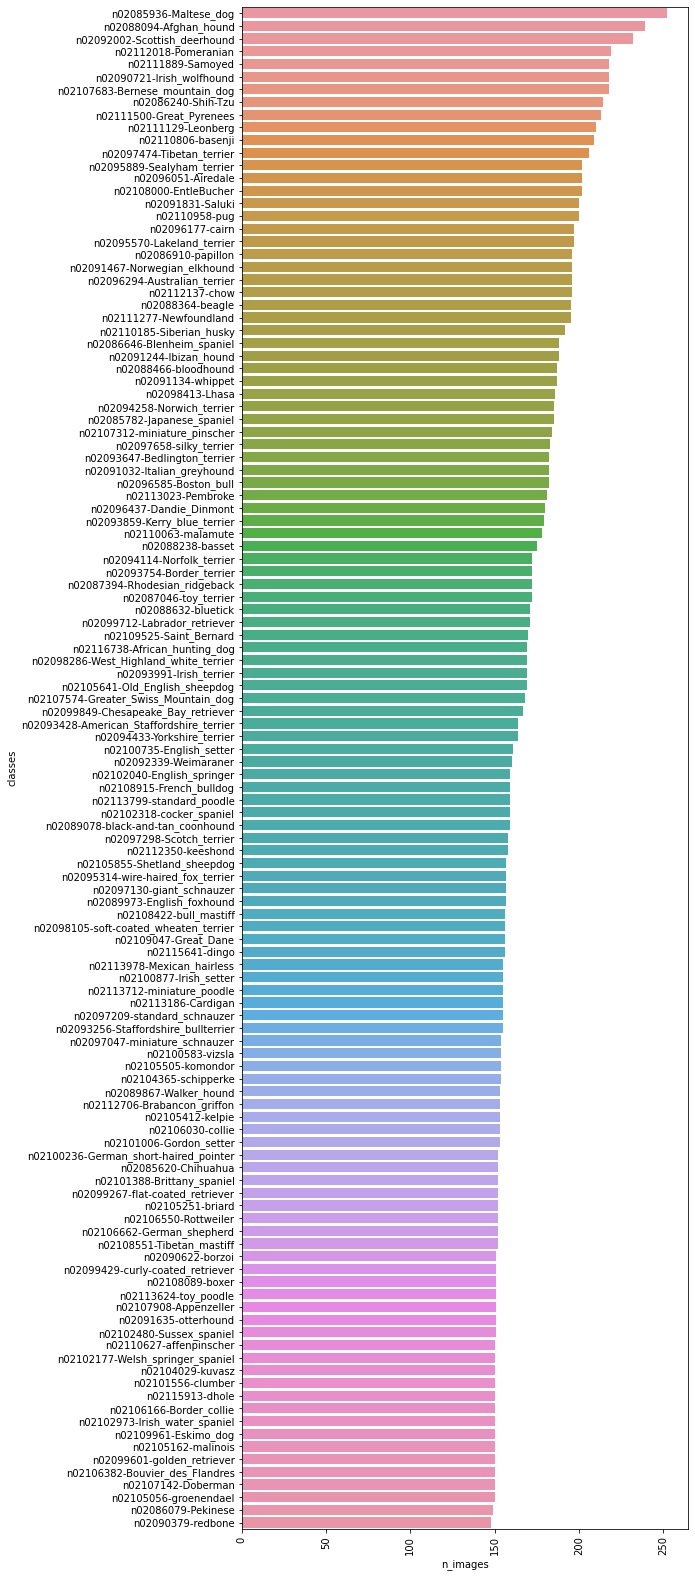

In [21]:
import seaborn as sns
plt.figure(figsize=(8, 28))
sns.barplot(data=df_dic.sort_values(by='n_images', ascending=False), y='classes', x='n_images', orient='h')
plt.xticks(rotation=90)
plt.show()

# Repartition en Train, Test

### Repartition des images en X_train et X_test

In [18]:
#Répartition des données en train, test 
!mkdir /deeplearn
!mkdir /deeplearn/train
!mkdir /deeplearn/test

In [20]:
dir = list(set(list(i.split('/')[0] for i in X_train_list)))
len(dir)

120

In [21]:
for i in dir:
  os.mkdir(f"/deeplearn/train/{i}")
  os.mkdir(f'/deeplearn/test/{i}')

In [22]:
for i in os.listdir("/kaggle/working/Images"):
  for j in os.listdir(os.path.join("/kaggle/working/Images",i)):
    #print(os.path.join(i, j))
    if os.path.join(i, j) in X_train_list: 
      shutil.move(os.path.join("/kaggle/working/Images",i,j),os.path.join("/deeplearn/train",i,j) )
    elif os.path.join(i, j) in X_test_list:
      shutil.move(os.path.join("/kaggle/working/Images",i,j),os.path.join("/deeplearn/test" ,i,j))

In [23]:
train_path='/deeplearn/train'
test_path='/deeplearn/test'

### Nombre d'images par classes dans X_train

In [24]:

dic={i:0 for i in classes}

for j in classes:
  dic[j]=len(os.listdir(os.path.join(train_path, j)))
      

print(dic)

{'n02090622-borzoi': 100, 'n02113186-Cardigan': 100, 'n02115641-dingo': 100, 'n02110185-Siberian_husky': 100, 'n02112706-Brabancon_griffon': 100, 'n02106550-Rottweiler': 100, 'n02113624-toy_poodle': 100, 'n02096437-Dandie_Dinmont': 100, 'n02105162-malinois': 100, 'n02102318-cocker_spaniel': 100, 'n02112350-keeshond': 100, 'n02111277-Newfoundland': 100, 'n02110806-basenji': 100, 'n02104029-kuvasz': 100, 'n02100236-German_short-haired_pointer': 100, 'n02091831-Saluki': 100, 'n02088632-bluetick': 100, 'n02115913-dhole': 100, 'n02093991-Irish_terrier': 100, 'n02109047-Great_Dane': 100, 'n02111129-Leonberg': 100, 'n02096051-Airedale': 100, 'n02113712-miniature_poodle': 100, 'n02102040-English_springer': 100, 'n02091134-whippet': 100, 'n02086646-Blenheim_spaniel': 100, 'n02116738-African_hunting_dog': 100, 'n02113023-Pembroke': 100, 'n02091635-otterhound': 100, 'n02104365-schipperke': 100, 'n02094433-Yorkshire_terrier': 100, 'n02101006-Gordon_setter': 100, 'n02098105-soft-coated_wheaten_terr

In [30]:
df_train=pd.DataFrame().from_dict({"classes":dic.keys(), "n_images":dic.values() })# , , columns=['classes', ''])
df_train.sort_values(by='n_images', ascending=False).head(10)

,classes,n_images
0,n02085782-Japanese_spaniel,100
1,n02089973-English_foxhound,100
88,n02097658-silky_terrier,100
87,n02098105-soft-coated_wheaten_terrier,100
86,n02113023-Pembroke,100
85,n02113624-toy_poodle,100
84,n02098413-Lhasa,100
83,n02115641-dingo,100
82,n02112706-Brabancon_griffon,100
81,n02100877-Irish_setter,100


In [31]:
np.unique(list(dic.values()))

array([100])

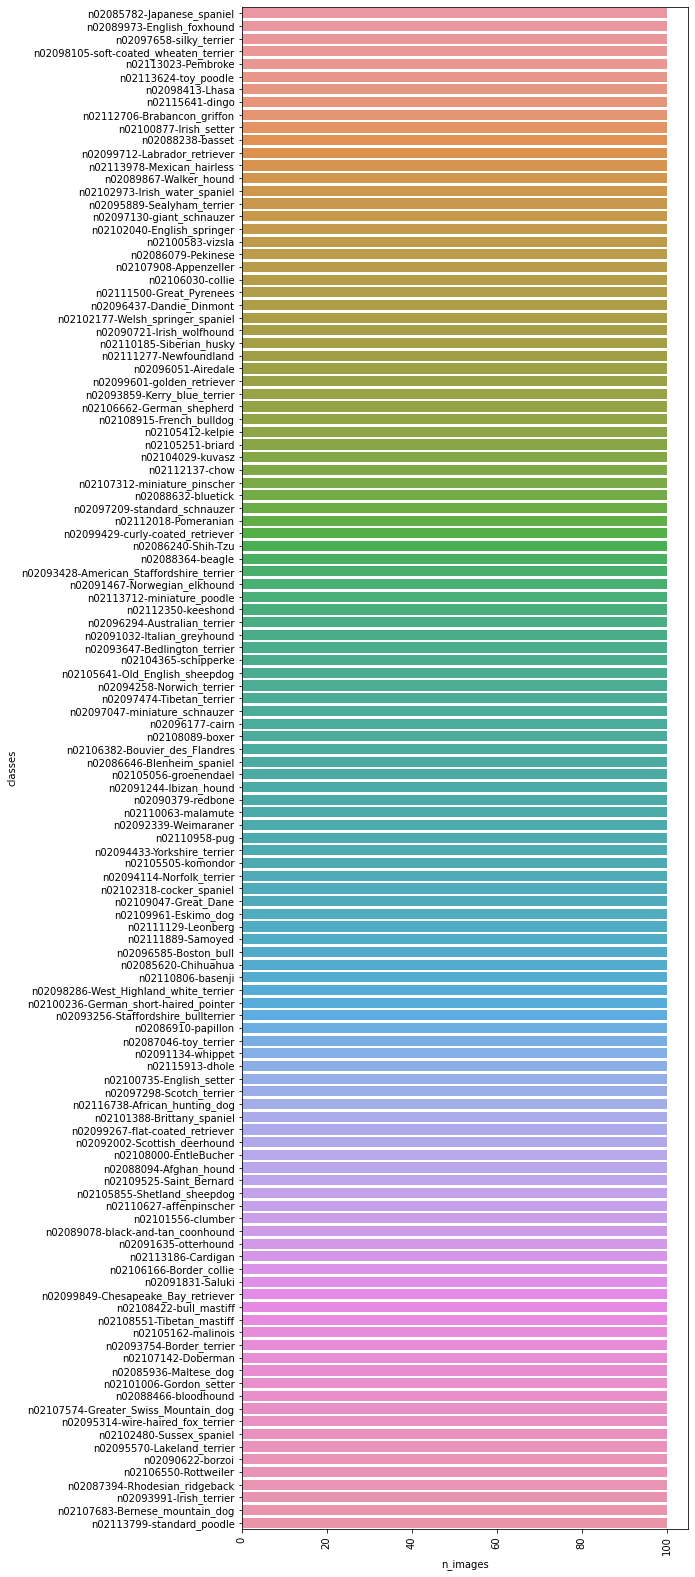

In [32]:
import seaborn as sns
plt.figure(figsize=(8, 28))
sns.barplot(data=df_train.sort_values(by='n_images', ascending=False), y='classes', x='n_images', orient='h')
plt.xticks(rotation=90)
plt.show()

Nous avons au total 100 images par classes pour le X_train

# Visualisation 

In [25]:
def showimg(x):
    plt.imshow(x)
    plt.show()

In [27]:
len(X_train_list)

12000

In [35]:
import glob
from random import randint


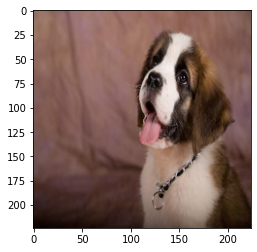

n02109525-Saint_Bernard


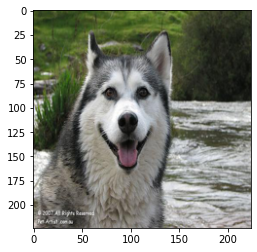

n02110185-Siberian_husky


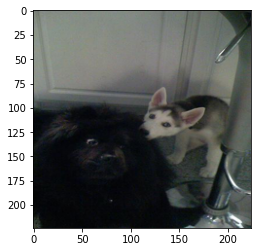

n02110185-Siberian_husky


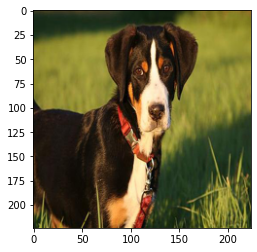

n02107574-Greater_Swiss_Mountain_dog


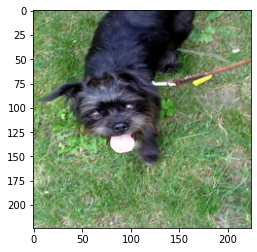

n02110627-affenpinscher


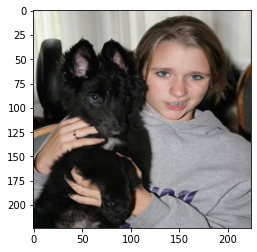

n02105056-groenendael


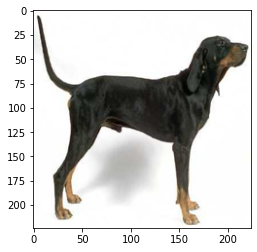

n02089078-black-and-tan_coonhound


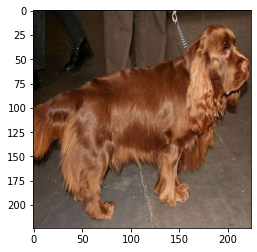

n02102480-Sussex_spaniel


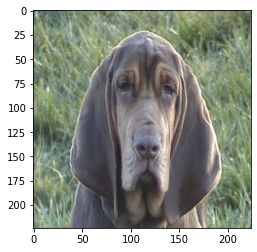

n02088466-bloodhound


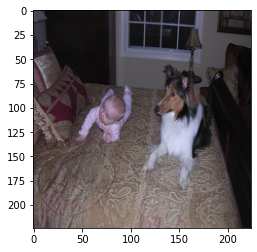

n02105855-Shetland_sheepdog


In [ ]:
files=glob.glob("/deep/train/*.jpg")

for i in [randint(0, len(X_train_list)) for j in range(10)]:

    showimg(np.array(Image.open(os.path.join(train_path, X_train_list[i])).resize((224, 224))))
    print(X_train_list[i].split('/')[0])



# Image Preprocessing by ImageDaGenerator

In [28]:
batch_size=8
from tensorflow.python.ops.gen_batch_ops import batch
from keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(#rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True)
test_gen = ImageDataGenerator(rescale = 1./255)

train_data=train_gen.flow_from_directory(
                                 train_path,
                                 target_size=(224,224),
                                  batch_size=batch_size,
                                  subset="training",
                                  class_mode='categorical'
                                     )
val_data=train_gen.flow_from_directory(train_path,
                                 target_size=(224,224),
                                  batch_size=batch_size,
                                  subset="validation",
                                  class_mode='categorical')
test_data=test_gen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
) 

Found 9600 images belonging to 120 classes.
Found 2400 images belonging to 120 classes.
Found 8580 images belonging to 120 classes.


In [38]:
class_list=list(set([i.split('/')[0] for i in X_train_list]))
len(class_list)

120

# Affichage des data générés

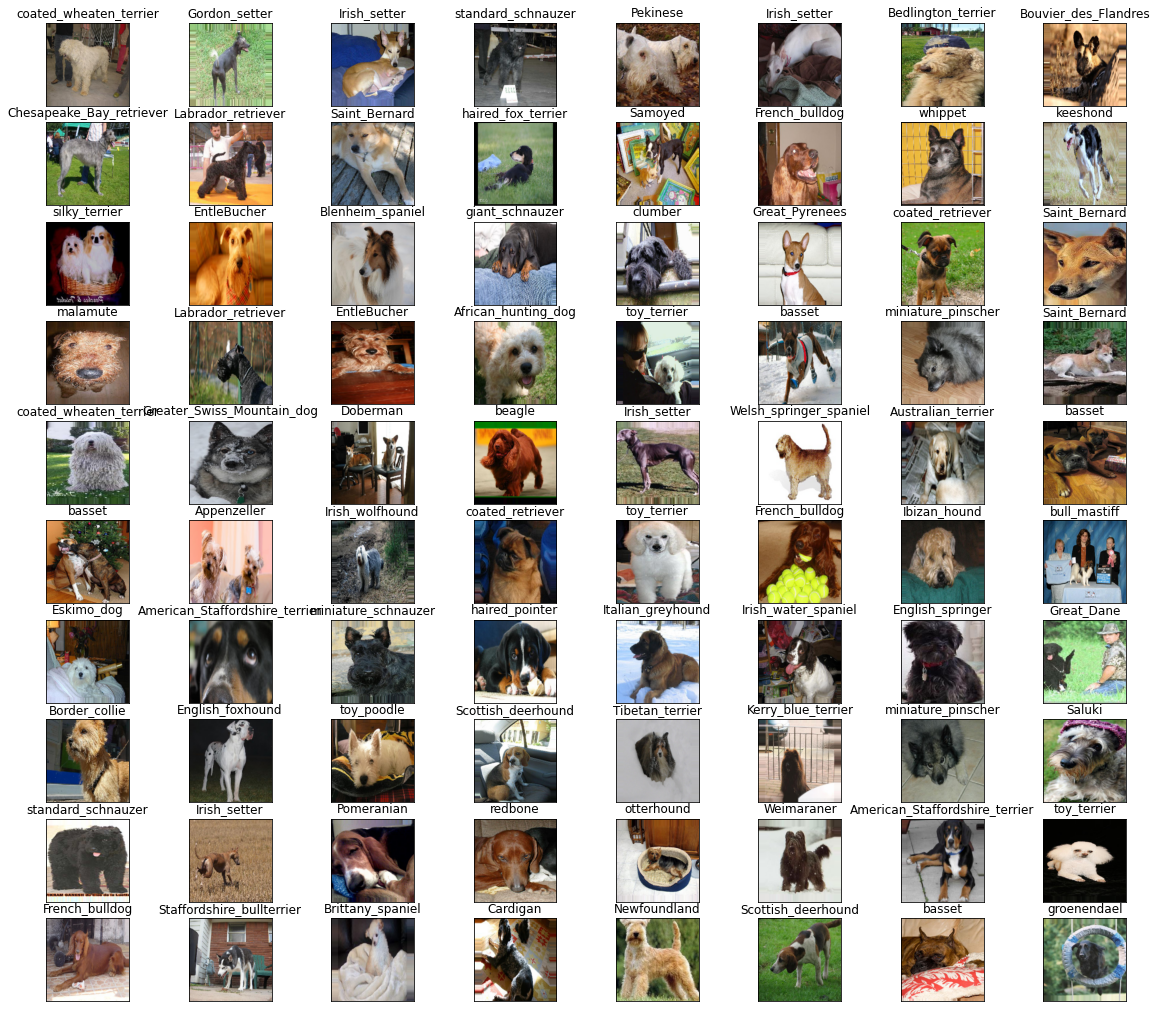

In [39]:
rows=10
fig, axes = plt.subplots(rows,batch_size)
for r in range(rows):    
    #---obtenir le batch de images généré---
    image_batch = train_data.next()    
    #---obtenir le nombre d'images ---
    images_count = image_batch[0].shape[0]
    for c in range(images_count):
        #---convertir en type unsigned---
        image = image_batch[0][c].astype('uint8')
        
        #---Affichage---
        axes[r,c].imshow(image)
        #---Affichage de la classe de l'image---
        axes[r,c].title.set_text(
            class_list[np.argmax(image_batch[1][c])].split('-')[-1])
        #---hides the x and y-ticks---
        axes[r,c].set_xticks([])
        axes[r,c].set_yticks([])
fig.set_size_inches(20,18)

# Models CNN

## Model CNN1

In [29]:
batch_size=32
from tensorflow.python.ops.gen_batch_ops import batch
from keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True)
test_gen = ImageDataGenerator(rescale = 1./255)

train_data=train_gen.flow_from_directory(
                                 train_path,
                                 target_size=(224,224),
                                  batch_size=batch_size,
                                  subset="training",
                                  class_mode='categorical'
                                     )
val_data=train_gen.flow_from_directory(train_path,
                                 target_size=(224,224),
                                  batch_size=batch_size,
                                  subset="validation",
                                  class_mode='categorical')
test_data=test_gen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
) 

Found 9600 images belonging to 120 classes.
Found 2400 images belonging to 120 classes.
Found 8580 images belonging to 120 classes.


In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(120, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 128)       7

2022-12-09 19:58:43.196710: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 19:58:43.197134: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 19:58:43.197992: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 19:58:43.198636: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [31]:
step_size_train=train_data.n//32
step_size_test=test_data.n//32
step_size_val=val_data.n//32

In [33]:
#Entrainement
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

history=model.fit(train_data,epochs=20, steps_per_epoch=step_size_train,verbose=1,
                   validation_data=val_data, validation_steps=step_size_val, callbacks=callbacks)

Epoch 1/20
300/300 [==============================] - 157s 522ms/step - loss: 4.7884 - accuracy: 0.0057 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 2/20
300/300 [==============================] - 155s 517ms/step - loss: 4.7884 - accuracy: 0.0059 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 3/20
300/300 [==============================] - 157s 522ms/step - loss: 4.7884 - accuracy: 0.0063 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 4/20
300/300 [==============================] - 158s 527ms/step - loss: 4.7884 - accuracy: 0.0049 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 5/20
300/300 [==============================] - 155s 518ms/step - loss: 4.7884 - accuracy: 0.0061 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 6/20
300/300 [==============================] - 155s 518ms/step - loss: 4.7884 - accuracy: 0.0061 - val_loss: 4.7875 - val_accuracy: 0.0083
Epoch 7/20
300/300 [==============================] - 155s 517ms/step - loss: 4.7884 - accuracy: 0.0067 - val_loss: 4.7875 -

In [36]:
#Score:
score=model.evaluate(test_data)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

269/269 [==============================] - 32s 119ms/step - loss: 4.7874 - accuracy: 0.0112
Test Loss :  4.78739070892334
Test Accuracy :  0.011188811622560024


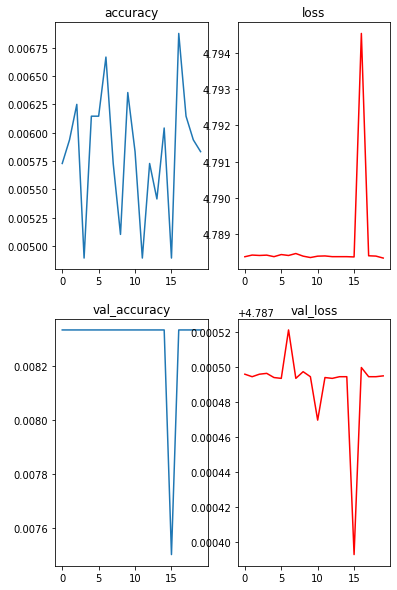

In [35]:
#Affichage du graphe de perte et de precision
fig, axes=plt.subplots(2, 2)
fig.set_figheight(10)
axes[0, 0].plot(history.history["accuracy"])
axes[0, 0].set_title("accuracy")
axes[0, 1].plot(history.history['loss'], c='r')
axes[0, 1].set_title("loss")
axes[1, 0].plot(history.history["val_accuracy"])
axes[1, 0].set_title("val_accuracy")
axes[1, 1].plot(history.history['val_loss'], c='r')
axes[1, 1].set_title("val_loss")
plt.show()

## Model CNN2

In [48]:

from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(120, activation='softmax')) # 2 parce que nous avons 120 classes

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)       

In [50]:
#Entrainement
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

history=model.fit(train_data,epochs=20, steps_per_epoch=step_size_train,verbose=1,
                   validation_data=val_data, validation_steps=step_size_val, callbacks=callbacks)

Epoch 1/20
300/300 [==============================] - 157s 520ms/step - loss: 5.2811 - accuracy: 0.0193 - val_loss: 5.6895 - val_accuracy: 0.0117
Epoch 2/20
300/300 [==============================] - 155s 518ms/step - loss: 4.9785 - accuracy: 0.0339 - val_loss: 4.7085 - val_accuracy: 0.0233
Epoch 3/20
300/300 [==============================] - 156s 521ms/step - loss: 4.5795 - accuracy: 0.0541 - val_loss: 4.4544 - val_accuracy: 0.0442
Epoch 4/20
300/300 [==============================] - 154s 515ms/step - loss: 4.3480 - accuracy: 0.0678 - val_loss: 4.6361 - val_accuracy: 0.0463
Epoch 5/20
300/300 [==============================] - 155s 517ms/step - loss: 4.1787 - accuracy: 0.0869 - val_loss: 4.6478 - val_accuracy: 0.0421
Epoch 6/20
300/300 [==============================] - 155s 518ms/step - loss: 4.0044 - accuracy: 0.1066 - val_loss: 4.7621 - val_accuracy: 0.0467
Epoch 7/20
300/300 [==============================] - 155s 516ms/step - loss: 3.8510 - accuracy: 0.1286 - val_loss: 4.5368 -

In [51]:
#Score:
score=model.evaluate(test_data)
print("Loss sur le Test_set: ", score[0])
print("Accuracy sur le Train_set: ", score[1])

269/269 [==============================] - 34s 125ms/step - loss: 4.2172 - accuracy: 0.1508
Perte sur le Test_set:  4.217176914215088
Precision sur le Train_set:  0.15081584453582764


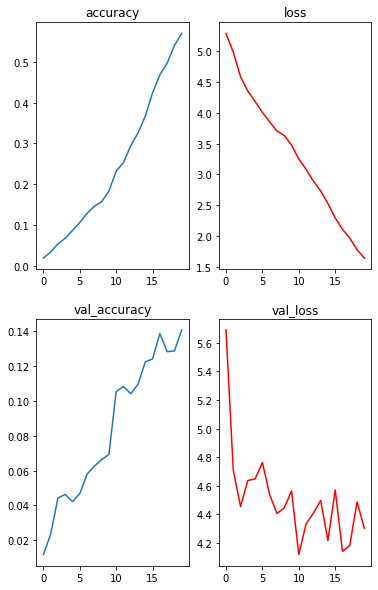

In [62]:
#Affichage du graphe de perte et de precision
fig, axes=plt.subplots(2, 2)
fig.set_figheight(10)
axes[0, 0].plot(history.history["accuracy"])
axes[0, 0].set_title("accuracy")
axes[0, 1].plot(history.history['loss'], c='r')
axes[0, 1].set_title("loss")
axes[1, 0].plot(history.history["val_accuracy"])
axes[1, 0].set_title("val_accuracy")
axes[1, 1].plot(history.history['val_loss'], c='r')
axes[1, 1].set_title("val_loss")
plt.show()

## Prediction

C'est l'image d'un Chien Chiwawa


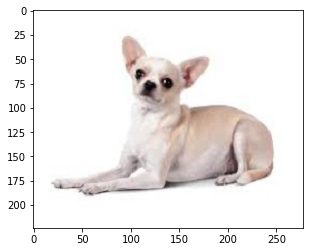

In [81]:
pa="/kaggle/input/images-pred/chiwawa.jpg"
plt.imshow(np.array(Image.open(pa)))
print("C'est l'image d'un Chien Chiwawa")

In [82]:
classes=[]
for i in X_train_list:
  if i.split('/')[0] in classes:
    pass
  else:
    classes.append(i.split('/')[0])
len(classes)

120

In [89]:
#import keras.utils as image
#from keras.utils import img_to_array
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
img=image.load_img(pa, target_size=(224,224))
img=img_to_array(img)
img=np.expand_dims(img, axis=0)
result=model.predict([img])


In [90]:
predict=classes[list(result[0]).index(np.max(result[0]))]
predict

'n02105505-komondor'

In [73]:
model.save("cnn.h5")

# Transfert Learning

## Model

In [74]:
step_size_train=train_data.n//train_data.batch_size
step_size_test=test_data.n//test_data.batch_size
step_size_val=val_data.n//val_data.batch_size

In [75]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras import optimizers
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications

In [84]:
vgg=VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in vgg.layers:
  layer.trainable=False
x=GlobalMaxPooling2D()(vgg.output)
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
flat=Flatten()(vgg.output)
out=Dense(120, activation="softmax")(flat)
model1=Model(inputs=vgg.input, outputs=out)
model1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=["accuracy"])

In [85]:
model1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [86]:
#Entrainement
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau
lr=ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6, verbose=1)
ckp=ModelCheckpoint(filepath='model.h5', save_best_only=True)
clb=[ckp,lr]

history=model1.fit(train_data,epochs=20, steps_per_epoch=step_size_train,verbose=1,
                   validation_data=val_data, validation_steps=step_size_val)


Epoch 1/20
300/300 [==============================] - 160s 531ms/step - loss: 5.6188 - accuracy: 0.0946 - val_loss: 5.2235 - val_accuracy: 0.1296
Epoch 2/20
300/300 [==============================] - 158s 528ms/step - loss: 3.2924 - accuracy: 0.3499 - val_loss: 5.0464 - val_accuracy: 0.1575
Epoch 3/20
300/300 [==============================] - 159s 530ms/step - loss: 2.4692 - accuracy: 0.4725 - val_loss: 5.4622 - val_accuracy: 0.1538
Epoch 4/20
300/300 [==============================] - 158s 527ms/step - loss: 1.8958 - accuracy: 0.5725 - val_loss: 5.4060 - val_accuracy: 0.1821
Epoch 5/20
300/300 [==============================] - 159s 531ms/step - loss: 1.4923 - accuracy: 0.6494 - val_loss: 5.4619 - val_accuracy: 0.1854
Epoch 6/20
300/300 [==============================] - 159s 529ms/step - loss: 1.1688 - accuracy: 0.7142 - val_loss: 5.6215 - val_accuracy: 0.1967
Epoch 7/20
300/300 [==============================] - 160s 531ms/step - loss: 1.0514 - accuracy: 0.7430 - val_loss: 5.7933 -

In [87]:
#Score:
score=model1.evaluate(test_data)
print("Perte sur le Test_set: ", score[0])
print("Precision sur le Test_set: ", score[1])

269/269 [==============================] - 39s 145ms/step - loss: 8.0289 - accuracy: 0.2287
Perte sur le Test_set:  8.028903007507324
Precision sur le Test_set:  0.22867132723331451


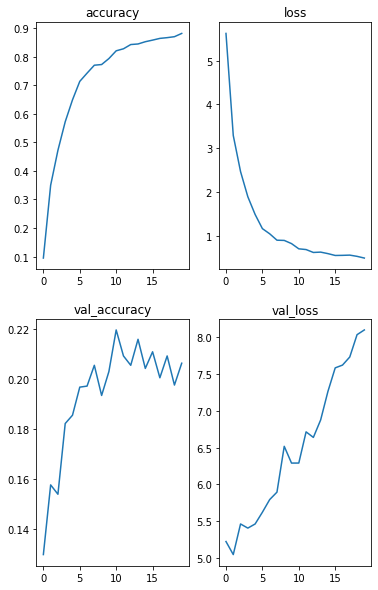

In [91]:
#Affichage du graphe de perte et de precision
fig, axes=plt.subplots(2, 2)
fig.set_figheight(10)
axes[0, 0].plot(history.history["accuracy"])
axes[0, 0].set_title("accuracy")
axes[0, 1].plot(history.history['loss'])
axes[0, 1].set_title("loss")
axes[1, 0].plot(history.history["val_accuracy"])
axes[1, 0].set_title("val_accuracy")
axes[1, 1].plot(history.history['val_loss'])
axes[1, 1].set_title("val_loss")
plt.show()

## Prediction

C'est l'image d'un Chien Chihuahua


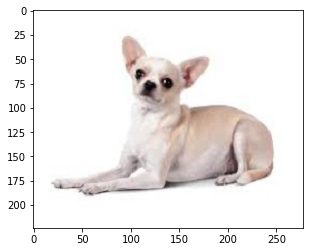

In [92]:
pa="/kaggle/input/images-pred/chiwawa.jpg"
plt.imshow(np.array(Image.open(pa)))
print("C'est l'image d'un Chien Chihuahua")

In [93]:
classes=[]
for i in X_train_list:
  if i.split('/')[0] in classes:
    pass
  else:
    classes.append(i.split('/')[0])
len(classes)

120

In [96]:
#import keras.utils as image
#from keras.utils import img_to_array
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
img=image.load_img(pa, target_size=(224,224))
img=img_to_array(img)
img=np.expand_dims(img, axis=0)
result=model1.predict([img])
result

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [98]:
for i, j in zip(result[0], classes):
    if i==1:
      prediction=j
prediction

'n02085620-Chihuahua'

In [99]:
model1.save("vgg.h5")